# IMPORTACION DE LIBRERIAS NECESARIAS


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

# LECTURA DE DATOS


In [81]:
data = pd.read_excel(r'BD_URGENCIAS_BIO.xlsx')
data.head()

,COD,DESCRIPCION,Año,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,1102,URGENCIAS ADULTO,2023,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,1102,URGENCIAS ADULTO,2023,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,1102,URGENCIAS ADULTO,2023,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,1102,URGENCIAS ADULTO,2023,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,1102,URGENCIAS ADULTO,2023,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39745 entries, 0 to 39744
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   COD                                    39745 non-null  int64  
 1   DESCRIPCION                            39745 non-null  object 
 2   Año                                    39745 non-null  int64  
 3   Mes                                    39745 non-null  object 
 4   Paciente Tipo Identificacion           39745 non-null  object 
 5   Nro Atencion                           39745 non-null  int64  
 6   Servicio Admite                        39745 non-null  object 
 7   Servicio Anterior                      32226 non-null  object 
 8   Servicio Egreso                        39745 non-null  object 
 9   Tipo Egreso (INTERNACION)              39745 non-null  object 
 10  Paciente Entidad Responsable Pago      39745 non-null  int64  
 11  Pa

In [76]:
print(data.columns) # Para ver nombre real de las columnas con espacios y saltos de línea

Index(['COD', 'DESCRIPCION', 'Año', 'Mes', 'Paciente Tipo Identificacion',
       'Nro Atencion', 'Servicio Admite', 'Servicio Anterior',
       'Servicio Egreso', 'Tipo Egreso (INTERNACION)',
       'Paciente Entidad Responsable Pago', 'Paciente Modalidad Contrato',
       'Paciente Regimen Afiliacion', 'Urg Fecha (Camara)',
       'Urg Fecha Ingreso', 'Urg Fecha Triaje', 'Urg Fecha Consulta F3',
       'Dias (Camara - F3)', 'Horas (Camara - F3)', 'Minutos (Camara - F3)',
       'Urg Demora1 Consulta (Minutos)', 'Dias (Camara - Triaje)',
       'Horas (Camara - Triaje)', 'Urg Demora Triaje (Minutos)\n',
       'Dias (Triaje - F3)', 'Horas (Triaje - F3)', 'Minutos (Triaje - F3)',
       'Urg Demora2 Consulta (Minutos)', 'Profesional Especialidad',
       'Dx Principal Tipo ', 'Dx Principal Cod', 'Dx Principal',
       'Dx Principal Capitulo Cod', 'Dx Principal Capitulo\n',
       'Dx Principal Cod.1', 'Dx Principal.1', 'Dx Relacionado1 Cod',
       'Dx Relacionado1\n', 'Dx Relacionado2

## Variables númericas

In [35]:
data.describe()

,COD,Año,Nro Atencion,Paciente Entidad Responsable Pago,Dias (Camara - F3),Horas (Camara - F3),Minutos (Camara - F3),Urg Demora1 Consulta (Minutos),Dias (Camara - Triaje),Horas (Camara - Triaje),...,Dias,Horas,Minutos,Tiempo Egreso Urgencias,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total
count,39745.0,39745.0,3.974500e+04,39745.000000,39744.0,39744.000000,39745.000000,39745.000000,39745.0,39745.000000,...,39744.000000,39744.000000,39744.000000,28820.000000,21097.000000,18100.000000,22509.000000,17261.000000,25201.000000,39745.000000
mean,1102.0,2023.0,1.345857e+11,38.846396,0.0,0.042736,61.537700,43.183693,0.0,0.005150,...,0.084667,2.180379,114.700081,1032.735427,709.835664,989.108950,342.348483,596.990267,1067.947066,1130.303309
std,0.0,0.0,7.955160e+10,21.252590,0.0,0.058331,83.997075,76.696936,0.0,0.006997,...,1.148883,27.065652,1547.257898,1750.003457,2426.267218,2779.918034,853.176379,2205.600704,3179.767137,2933.000766
min,1102.0,2023.0,1.234032e+07,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,-18.000000,-1038.000000,-31963.000000,-124.000000,0.000000,-1362.000000,-5496.000000,0.000000,-5496.000000
25%,1102.0,2023.0,6.537377e+10,18.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,23.000000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000
50%,1102.0,2023.0,1.329287e+11,48.000000,0.0,0.032068,46.166667,19.133333,0.0,0.002847,...,0.000000,1.000000,51.000000,438.000000,6.000000,0.000000,142.000000,0.000000,176.000000,304.000000
75%,1102.0,2023.0,2.029542e+11,48.000000,0.0,0.054758,78.850000,48.850000,0.0,0.007581,...,0.000000,2.000000,100.000000,1264.000000,45.000000,423.000000,405.000000,10.000000,438.000000,674.000000
max,1102.0,2023.0,2.755966e+11,74.000000,0.0,0.748102,1077.266667,1047.266667,0.0,0.154021,...,148.000000,3556.000000,213364.000000,45725.000000,38413.000000,143089.000000,32144.000000,38104.000000,43222.000000,43222.000000


## Variables categoricas

In [72]:
data.describe(include=[object,bool])

,DESCRIPCION,Mes,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),Urg Fecha Ingreso,...,Ubicacion Urgencias,Causa Externa (Riesgo),Modalidad Atencion,Ubicación Triaje,Tiempo Duracion Diligenciamiento F3,Triaje Re-clasificado,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
count,39745,39745,39745,32226,39745,39745,39745,39739,39745,39745,...,39737,39745,39737,39745,30180,39745,39745,39742,39736,39725
unique,2,12,10,53,46,6,3,4,39724,39723,...,5,9,3,13,2998,2,2,6,6,11
top,URGENCIAS ADULTO,ABRIL,URGENCIAS GENERALES SÓTANO,NO APLICA,NO APLICA,ALTA MÉDICA,EVENTO,CONTRIBUTIVO,15/06/2023 5:54:12,30/05/2023 12:54:43,...,OBSERVACION,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
freq,31903,4022,18977,16320,16320,20348,33740,16424,2,2,...,21754,35696,31864,12774,3876,30241,24961,21070,37148,37916


# Análisis de características innecesarias o poco descriptivas

Correlación

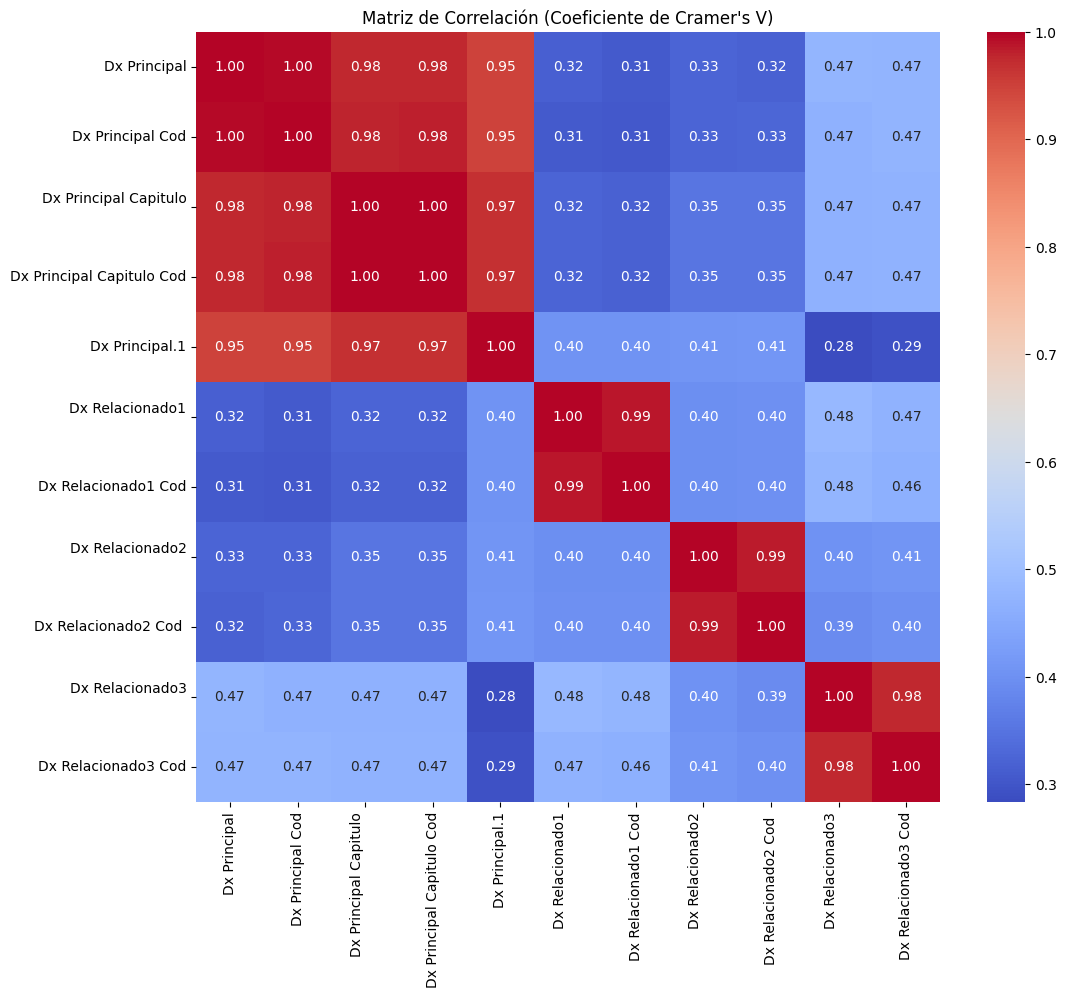

In [82]:
# Seleccionar las columnas relevantes
relevant_columns = ['Dx Principal', 'Dx Principal Cod', 'Dx Principal Capitulo\n', 
                    'Dx Principal Capitulo Cod', 'Dx Principal.1', 
                    'Dx Relacionado1\n', 'Dx Relacionado1 Cod', 'Dx Relacionado2\n', 
                    'Dx Relacionado2 Cod ','Dx Relacionado3\n', 'Dx Relacionado3 Cod']
subset_data = data[relevant_columns]

# Calcular el coeficiente de Cramer's V
def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular la matriz de correlación usando el coeficiente de Cramer's V
correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
for i in range(len(relevant_columns)):
    for j in range(len(relevant_columns)):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(subset_data.iloc[:, i], subset_data.iloc[:, j])
            correlation_matrix.iloc[i, j] = cramers_v(contingency_table)

plt.figure(figsize=(12, 10))
# mapa de calor
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Coeficiente de Cramer's V)")
plt.show()

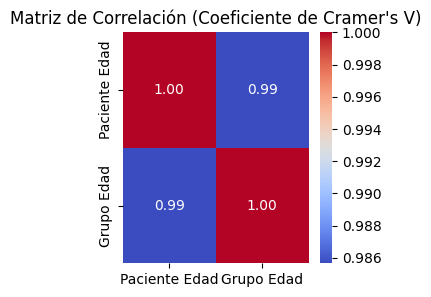

In [83]:
# Seleccionar las columnas relevantes
relevant_columns = ['Paciente Edad', 'Grupo Edad']
subset_data = data[relevant_columns]

# Calcular el coeficiente de Cramer's V
def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular la matriz de correlación usando el coeficiente de Cramer's V
correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
for i, col1 in enumerate(relevant_columns):
    for j, col2 in enumerate(relevant_columns):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(subset_data[col1], subset_data[col2])
            correlation_matrix.iloc[i, j] = cramers_v(contingency_table)

# Configurar el tamaño del gráfico
plt.figure(figsize=(3,3))

# mapa de calor
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Coeficiente de Cramer's V)")
plt.show()


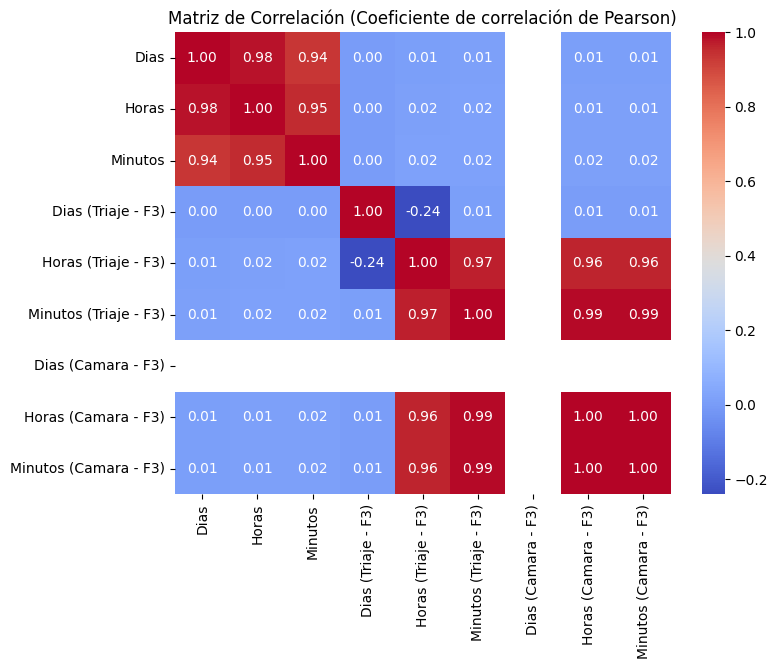

In [84]:
# Seleccionar las columnas relevantes
relevant_columns = ['Dias', 'Horas', 'Minutos','Dias (Triaje - F3)','Horas (Triaje - F3)','Minutos (Triaje - F3)','Dias (Camara - F3)', 'Horas (Camara - F3)', 'Minutos (Camara - F3)']
subset_data = data[relevant_columns]

# Calcular la matriz de correlación usando el coeficiente de correlación de Pearson
correlation_matrix = subset_data.corr(method='pearson')

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación (Coeficiente de correlación de Pearson)")

# Mostrar el gráfico
plt.show()

In [86]:
print(data['Dias (Triaje - F3)'])
unique_modalidad_contrato = data['Dias (Triaje - F3)'].unique()
print("Valores únicos de Dias (Triaje - F3):", unique_modalidad_contrato)
# Lleno de ceros y -1 que no tiene sentido, se elimina variable

0        0
1        0
2        0
3        0
4        0
        ..
39740    0
39741    0
39742    0
39743    0
39744    0
Name: Dias (Triaje - F3), Length: 39745, dtype: int64
Valores únicos de Dias (Triaje - F3): [ 0 -1]


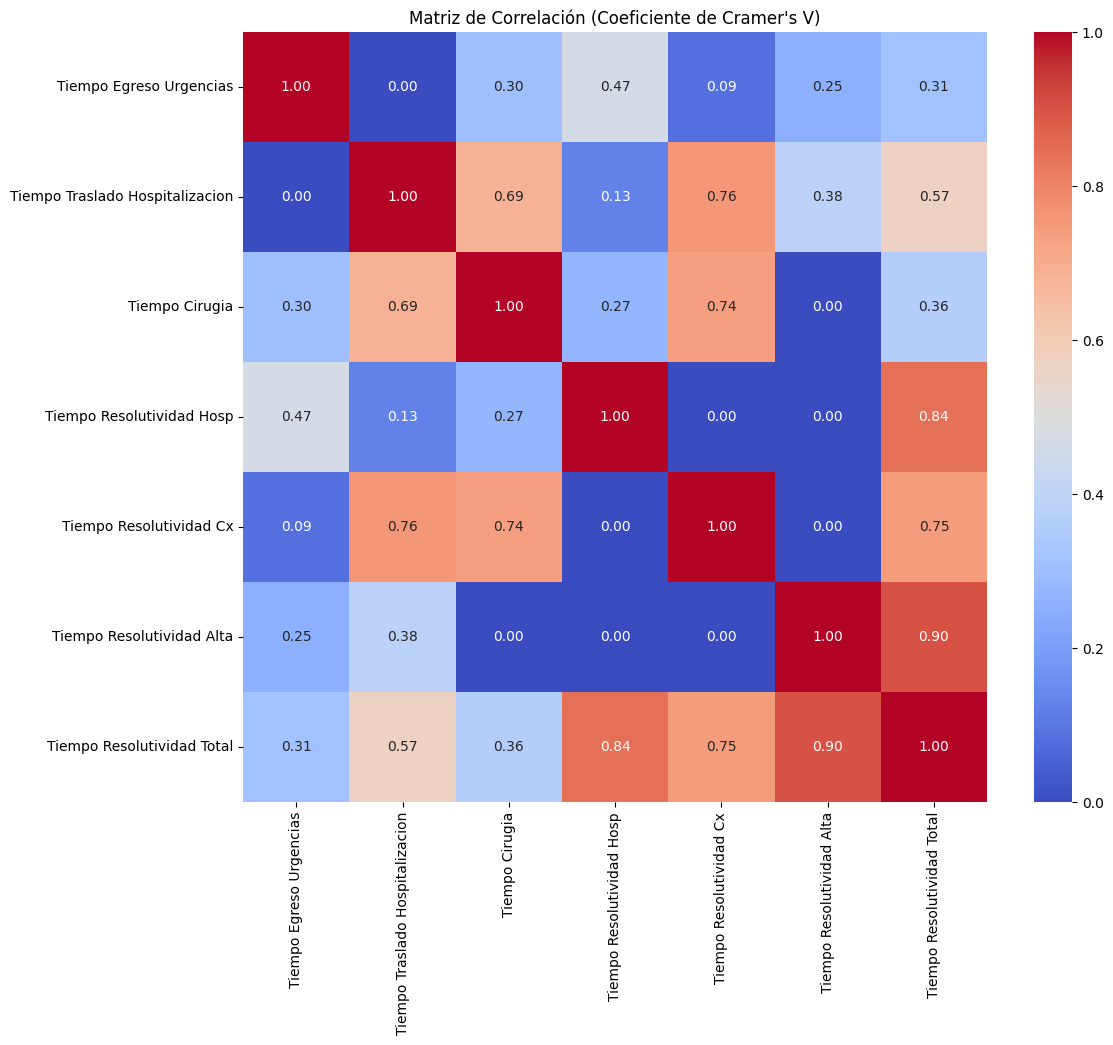

In [87]:
# Seleccionar las columnas relevantes
relevant_columns = ['Tiempo Egreso Urgencias',
       'Tiempo Traslado Hospitalizacion', 'Tiempo Cirugia',
       'Tiempo Resolutividad Hosp', 'Tiempo Resolutividad Cx',
       'Tiempo Resolutividad Alta', 'Tiempo Resolutividad Total']
subset_data = data[relevant_columns]

# Calcular el coeficiente de Cramer's V
def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular la matriz de correlación usando el coeficiente de Cramer's V
correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
for i in range(len(relevant_columns)):
    for j in range(len(relevant_columns)):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(subset_data.iloc[:, i], subset_data.iloc[:, j])
            correlation_matrix.iloc[i, j] = cramers_v(contingency_table)

plt.figure(figsize=(12, 10))
# mapa de calor
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Coeficiente de Cramer's V)")
plt.show()

De acuerdo a los análisis anteriores, por dependencia lineal de variables, se eliminan y se deja solo una de cada tipo (luego explicamos mejor)

In [38]:
columnas_valores_unicos = {columna: data[columna].nunique() for columna in data.columns}

columnas_ordenadas = sorted(columnas_valores_unicos.items(), key=lambda x: x[1])

variables_un_valor = []
for columna, num_valores_unicos in columnas_ordenadas:
    if num_valores_unicos == 1:
        variables_un_valor.append(columna)

# Eliminamos las variables que tienen un solo valor
data.drop(columns=variables_un_valor, inplace=True)
print(variables_un_valor) # ['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']

# Eliminamos el número de atención puesto que no es una variable explicativa
# Eliminamos la variable del tipo de identificación puesto que no es una varibale explicativa
# Eliminamos la variable de grupo de edad ya que ya esta explicada en la edad del paciente
# Eliminamos la variable Profesional Indentificación puesto que no es una variable explicativa
# Eliminamos la variable de Dx Principal puesto que esta repetida en la variable Dx Principal Cod
# Eliminamos la variable de Dx Principal Capitulo puesto que esta repetida en la variable Dx Principal Capitulo Cod
# Eliminamos la variable de Dx Principal.1 puesto que esta repetida en la variable Dx Principal.1 Cod
# Eliminamos la variable de Dx Relacionado1 puesto que esta repetida en la variable Dx Relacionado1 Cod
# Eliminamos la variable de Dx Relacionado2 puesto que esta repetida en la variable Dx Relacionado2 Cod
# Eliminamos la variable de Dx Relacionado3 puesto que esta repetida en la variable Dx Relacionado3 Cod
# Eliminamos la variable de Dx Principal Capitulo Cod puesto que es igual a la variable Dx Principal Cod sin el ultimo valor del código
# Eliminamos la variable Horas (Camara - F3) debido a que no es congruente con la resta entre las fechas de Camara y F3
# Las fechas de Camara y F3 no son congruentes debido a que a veces la fecha de camara es mayor que la de F3 
# Eliminamos la variable Dias (Triaje - F3) debido a que el 99% de los valores es 0 y el restante es -1

# Quitamos la variable unidad y convertimos los meses y dias a unidades de años
data['Paciente Edad'] = data['Paciente Edad'].astype(float)
data.loc[data['Unidad'] == 'Meses', 'Paciente Edad'] /= 12
data.loc[data['Unidad'] == 'Días', 'Paciente Edad'] /= 365


data.drop(columns=['Nro Atencion',
                    'Paciente Tipo Identificacion',
                    'Grupo Edad',
                    'Profesional Identificacion',
                    'Dx Principal',
                    'Dx Principal Capitulo\n',
                    'Dx Principal.1',
                    'Dx Relacionado1\n',
                    'Dx Relacionado2\n',
                    'Dx Relacionado3\n',
                    'Unidad',
                    'Dx Principal Capitulo Cod',
                    'Horas (Camara - F3)',
                    'Dias (Triaje - F3)'],
            inplace=True)

data

['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']


,DESCRIPCION,Mes,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,URGENCIAS ADULTO,ENERO,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,48,EVENTO,SUBSIDIADO,2023-01-15 20:15:31.733000,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,URGENCIAS ADULTO,ENERO,NO APLICA,NO APLICA,NO APLICA,NO APLICA,5,PGP,SUBSIDIADO,2023-01-01 14:14:06.223000,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,NO APLICA,NO APLICA,NO APLICA,NO APLICA,65,EVENTO,ESPECIAL,2023-01-07 18:21:27.977000,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,48,EVENTO,CONTRIBUTIVO,2023-01-11 11:19:16.737000,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,19,EVENTO,CONTRIBUTIVO,2023-01-07 10:08:49.397000,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,ALTA MÉDICA,4,EVENTO,SUBSIDIADO,17/12/2023 2:06:21,...,70.0,3459.0,0.0,162.0,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,NO ASEGURADO,25/12/2023 9:16:35,...,0.0,0.0,0.0,0.0,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,NO ASEGURADO,29/12/2023 11:20:02,...,0.0,0.0,0.0,0.0,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,REMISIÓN A OTRA INSTITUCIÓN,65,EVENTO,ESPECIAL,28/12/2023 8:35:43,...,0.0,0.0,838.0,0.0,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


# Análisis estadistico

## Mes

In [39]:
month_counts = data['Mes'].value_counts().sort_index()
months_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
max_count = month_counts.max()
value_counts = month_counts.reset_index()
value_counts.columns = ['Mes', 'Count']
# Histograma
fig = px.histogram(data, x='Mes', nbins=12, histfunc='count', 
                   hover_data={'Mes':False},
                   opacity=0.75, 
                   template="plotly", 
                   ) 
fig.update_layout(title='Distribución de pacientes en el año',
                  yaxis_title='No. de pacientes',
                  hovermode=False)

fig.update_traces(texttemplate='%{y}<br>',
                    textposition='outside')
fig.show()


## Diagnostico

In [40]:
diagnosticos_total = pd.concat([data['Dx Principal Cod'], 
                          data['Dx Relacionado1 Cod'], 
                          data['Dx Relacionado2 Cod '],
                          data['Dx Relacionado3 Cod']])

frecuencia_diagnosticos = diagnosticos_total.value_counts()
value_counts = frecuencia_diagnosticos.reset_index()
value_counts.columns = ['Category', 'Count']

total_count = value_counts['Count'].sum()
value_counts['Percentage'] = round((value_counts['Count'] / total_count) * 100, 2)

fig = px.treemap(value_counts, path=['Category'],
                values='Count', 
                hover_data={'Category': False, 'Count': True, 'Percentage':True},
                labels={'Percentage': 'Percentage (%)'})

fig.update_traces(hovertemplate='<b># de pacientes</b>: %{customdata[1]}<br>',
                  texttemplate='%{label}<br>%{customdata[2]}%')
fig.update_layout(title='Resumen de diagnosticos')
fig.show()

Relación diagnóstico principal con servicio que admite

In [41]:
result_df = data.groupby(['Dx Principal Cod.1', 'Servicio Admite']).size().reset_index(name='Cantidad')
diagnostico_total = result_df.groupby('Dx Principal Cod.1')['Cantidad'].transform('sum')
servicio_total = result_df.groupby('Servicio Admite')['Cantidad'].transform('sum')
result_df['Porcentaje'] = round((result_df['Cantidad'] / diagnostico_total) * 100, 2)
result_df['Porcentaje Servicio'] = round((result_df['Cantidad'] / servicio_total) * 100, 2)


fig = px.treemap(result_df, path=[px.Constant('Subcapitulos CIE10'),'Dx Principal Cod.1','Servicio Admite'],
                values='Cantidad', 
                custom_data=['Porcentaje', 'Porcentaje Servicio'],
                #labels={'Percentage': 'Percentage (%)'})
)
fig.update_traces(texttemplate='%{label}<br>%{customdata[0]:.2f}%')
fig.update_layout(title='Resumen capitulos CIE10',hovermode=False)
#fig.update_traces(hovertemplate='<b># de pacientes</b>: %{customdata[1]}<br>',
#                  texttemplate='%{label}<br>%{customdata[2]}%')
#fig.update_layout(title='Resumen de diagnosticos')
fig.show()

## Edad

In [42]:
fig = px.histogram(data, x='Paciente Edad', nbins=100, histfunc='count', 
                   #marginal='rug', # Show individual data points on the margin
                   opacity=0.75, # Adjust the opacity for better visualization
                   template="plotly", # Dark theme for a more stylish look
                   title='Distribucion de edades',
                   color='Clasificacion 1 Triaje \nEnfermeria '
                   ) 


fig.update_traces(hovertemplate='Edad: %{x}<br>Pacientes: %{y}')
# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='No. de pacientes',
    #showlegend=True, # No legend for simplicity
    #barmode='overlay', # Overlay the histograms
    bargap=0.1, # Adjust the gap between bars
)

# Show the plot
fig.show()


In [43]:
fig = px.histogram(data, x='Paciente Edad', nbins=100, histfunc='count', 
                   #marginal='rug', # Show individual data points on the margin
                   opacity=0.75, # Adjust the opacity for better visualization
                   template="plotly", # Dark theme for a more stylish look
                   title='Distribucion de edades',
                   color='Servicio Admite'
                   ) 


fig.update_traces(hovertemplate='Edad: %{x}<br>Pacientes: %{y}')
# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='No. de pacientes',
    #showlegend=True, # No legend for simplicity
    #barmode='overlay', # Overlay the histograms
    bargap=0.1, # Adjust the gap between bars
)

# Show the plot
fig.show()


In [44]:
result_df = data.groupby(['Clasificacion 1 Triaje \nEnfermeria ', 'Servicio Admite']).size().reset_index(name='Cantidad')
fig = px.bar(result_df,
            y="Clasificacion 1 Triaje \nEnfermeria ",
            x='Cantidad',
            color='Servicio Admite',
            orientation='h',
            opacity=0.75,
            template="plotly",
            )

fig.update_layout(title='Distribución de pacientes en el año',
                  xaxis_title='No. de pacientes',
                  hovermode=False)

fig.update_traces(texttemplate='%{x}<br>')
fig.show()

In [45]:
result_df

,Clasificacion 1 Triaje \nEnfermeria,Servicio Admite,Cantidad
0,NO APLICA,AMBULATORIA PERSONAL,1
1,NO APLICA,AMBULATORIA PROGRAMADA,2
2,NO APLICA,ATENCIÓN PRIORITARIA,3
3,NO APLICA,CIRUGÍA,13
4,NO APLICA,HOSPITALIZACIÓN,1454
5,NO APLICA,NO APLICA,522
6,NO APLICA,URGENCIAS GENERALES PISO 1,1
7,NO APLICA,URGENCIAS GENERALES SÓTANO,851
8,NO APLICA,URGENCIAS PEDIÁTRICAS,10
9,TRIAJE 1,HOSPITALIZACIÓN,15


Paciente Modalidad Contrato y Paciente Regimen Afiliacion

In [47]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Paciente Modalidad Contrato'].unique()
unique_regimen_afiliacion = data['Paciente Regimen Afiliacion'].unique()

print("Valores únicos de Paciente Modalidad Contrato:", unique_modalidad_contrato)
print("Valores únicos de Paciente Regimen Afiliacion:", unique_regimen_afiliacion)


Valores únicos de Paciente Modalidad Contrato: ['EVENTO' 'PGP' 'CAPITA']
Valores únicos de Paciente Regimen Afiliacion: ['SUBSIDIADO' 'ESPECIAL' 'CONTRIBUTIVO' 'NO ASEGURADO' nan]


In [48]:

# Gráfico de barras para Paciente Modalidad Contrato
fig = px.bar(data['Paciente Modalidad Contrato'].value_counts(), 
             title='Distribución de Modalidad de Contrato',
             labels={'value': 'Frecuencia', 'index': 'Modalidad de Contrato'})
fig.show()

# Gráfico de barras para Paciente Regimen Afiliacion
fig = px.bar(data['Paciente Regimen Afiliacion'].value_counts(), 
             title='Distribución de Regimen de Afiliacion',
             labels={'value': 'Frecuencia', 'index': 'Regimen de Afiliacion'})
fig.show()


In [49]:
# Frecuencia de cada categoría
freq_modalidad_contrato = data['Paciente Modalidad Contrato'].value_counts()
freq_regimen_afiliacion = data['Paciente Regimen Afiliacion'].value_counts()

print("Frecuencia de Paciente Modalidad Contrato:")
print(freq_modalidad_contrato)
print("\nFrecuencia de Paciente Regimen Afiliacion:")
print(freq_regimen_afiliacion)


Frecuencia de Paciente Modalidad Contrato:
EVENTO    33740
PGP        5974
CAPITA       31
Name: Paciente Modalidad Contrato, dtype: int64

Frecuencia de Paciente Regimen Afiliacion:
CONTRIBUTIVO    16424
SUBSIDIADO      13006
ESPECIAL         6987
NO ASEGURADO     3322
Name: Paciente Regimen Afiliacion, dtype: int64


In [55]:
# Tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Modalidad Contrato'], data['Servicio Admite'])

print("Tabla de Contingencia:")
print(contingency_table)


Tabla de Contingencia:
Servicio Admite              AMBULATORIA PERSONAL  AMBULATORIA PROGRAMADA  \
Paciente Modalidad Contrato                                                 
CAPITA                                          0                       0   
EVENTO                                          0                       1   
PGP                                             1                       3   

Servicio Admite              ATENCIÓN PRIORITARIA  CIRUGÍA  HOSPITALIZACIÓN  \
Paciente Modalidad Contrato                                                   
CAPITA                                          0        0                0   
EVENTO                                          3       17             2256   
PGP                                             0        4              471   

Servicio Admite              NO APLICA  TELETRIAJE  \
Paciente Modalidad Contrato                          
CAPITA                              30           0   
EVENTO                           

In [56]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Modalidad Contrato'], data['Servicio Admite'])

# Graficar la tabla de contingencia como un heatmap
fig = px.imshow(contingency_table, 
                labels=dict(x="Servicio Admite", y="Paciente Modalidad Contrato", color="Frecuencia"),
                x=contingency_table.columns,
                y=contingency_table.index,
                title='Tabla de Contingencia: Relación entre Paciente Modalidad Contrato y Servicio Admite')
fig.show()


In [57]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Regimen Afiliacion'], data['Servicio Admite'])

# Graficar la tabla de contingencia como un heatmap
fig = px.imshow(contingency_table, 
                labels=dict(x="Servicio Admite", y="Paciente Regimen Afiliacion", color="Frecuencia"),
                x=contingency_table.columns,
                y=contingency_table.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Servicio Admite')
fig.show()

In [58]:
# Calcular las proporciones por fila
contingency_table_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Graficar la tabla de contingencia como un heatmap de proporciones
fig = px.imshow(contingency_table_prop, 
                labels=dict(x="Servicio Admite", y="Paciente Regimen Afiliacion", color="Proporción"),
                x=contingency_table_prop.columns,
                y=contingency_table_prop.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Servicio Admite (Proporciones)')
fig.show()


In [59]:
# Calcular las proporciones por fila
contingency_table_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Calcular las proporciones respecto al total de cada tipo de régimen de afiliación
contingency_table_prop_norm = contingency_table_prop.div(contingency_table_prop.sum(axis=0), axis=1)

# Graficar la tabla de contingencia como un heatmap de proporciones respecto al total de cada tipo de régimen de afiliación
fig = px.imshow(contingency_table_prop_norm, 
                labels=dict(x="Servicio Admite", y="Paciente Regimen Afiliacion", color="Proporción"),
                x=contingency_table_prop_norm.columns,
                y=contingency_table_prop_norm.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Servicio Admite (Proporciones respecto al total de cada tipo de régimen de afiliación)')
fig.show()

Triaje

In [64]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Clasificacion Urg (Nivel)\nEnfermeria '].unique()
print("Valores únicos de Clasificacion 1 Triaje Enfermeria:", unique_modalidad_contrato)


Valores únicos de Clasificacion 1 Triaje Enfermeria: ['II. EMERGENCIA' 'III. URGENCIA' 'NO APLICA' 'I. RESUCITACION'
 'IV.URGENCIA DIFERIDA' 'V. NO URGENTE']


In [65]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Clasificacion 1 Triaje \nEnfermeria '].unique()
print("Valores únicos de Clasificacion 1 Triaje Enfermeria:", unique_modalidad_contrato)

Valores únicos de Clasificacion 1 Triaje Enfermeria: ['TRIAJE 2' 'TRIAJE 3' 'NO APLICA' 'TRIAJE 1' 'TRIAJE 4' 'TRIAJE 5' nan]


Grupo poblacional y pertenencias étnicas

In [78]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Grupo Poblacional'].unique()
unique_regimen_afiliacion = data['Pertenencia Etnica'].unique()

print("Valores únicos de Grupo Poblacional:", unique_modalidad_contrato)
print("Valores únicos de Pertenencia Etnica:", unique_regimen_afiliacion)

Valores únicos de Grupo Poblacional: ['POBLACIÓN GENERAL' nan 'VICTIMA DE CONFLICTO ARMADO'
 'HABITANTE DE CALLE' 0 3148207739 'REINTEGRADO O DESMOVILIZADO']
Valores únicos de Pertenencia Etnica: ['OTRAS ETNIAS'
 'NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AFRO DESCENDIENTE'
 'INDÍGENA' nan 'RROM (GITANO)'
 'RAIZAL (ARCHIPIELAGO DE SAN ANDRES Y PROVIDENCIA)'
 'PALANQUERO DE SAN BASILIO']


In [79]:
# Gráfico de barras para Grupo Poblacional
fig = px.bar(data['Grupo Poblacional'].value_counts(), 
             title='Distribución de Grupo Poblacional',
             labels={'value': 'Frecuencia', 'index': 'Grupo Poblacional'})
fig.show()

# Gráfico de barras para Pertenencia Etnica
fig = px.bar(data['Pertenencia Etnica'].value_counts(), 
             title='Distribución de Pertenencia Etnica',
             labels={'value': 'Frecuencia', 'index': 'Pertenencia Etnica'})
fig.show()